In [1]:
import numpy as np
import math
import random as rd
import matplotlib.pyplot as plt
import timeit
import time


def rtfixomg(N,T,dt,K,nruns):

    R=np.zeros([len(T),nruns])
    omg=np.random.uniform(low=-0.5,high=0.5, size= N) #sample of uniformly distributed angular frequencies

    #loop over runs
    for z in range(0,nruns):
        r=np.zeros(len(T))
        tht=np.random.uniform(low=0.0, high=2*np.pi, size=N) #random initial configuration of N oscillators
        THT=np.zeros([len(tht),len(T)])
        THT[:,0]=tht

        #loop over time
        for i in range(0,len(T)-1):
            A=np.exp(1j*THT[:,i])
            V=1/N*np.sum(A)
            psi=np.angle(V)
            r[i]=np.abs(V)
            
            #loop over oscillators
            for j in range(0,N):
                THT[j,i+1]=THT[j,i]+ dt*(omg[j]+K*r[i]*np.sin(psi-THT[j,i]))

        R[:,z]=r
    Ravg=np.zeros(len(T))
    for t in range(0,len(T)):
        Ravg[t]=np.mean(R[t,:])
    
    tic = time.clock()
    
    return R, Ravg, tic



In [2]:
N=3000
dt=0.005
T=np.arange(0,50,dt)
K=1
nruns=10

R=rtfixomg(N,T,dt,K,nruns)

C:\Users\Anouar\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


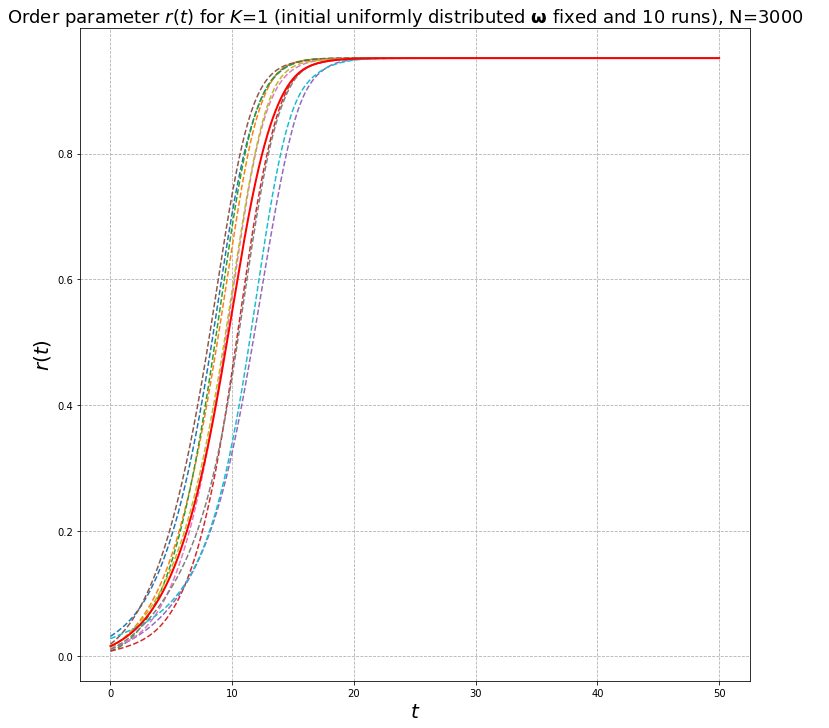

In [4]:
plt.figure(figsize=(12,12))
for z in range(0,nruns):
    plt.plot(T[:-1],R[0][:-1,z],linestyle='dashed')
plt.plot(T[:-1],R[1][:-1],lw=2,c="red", ls="-")
plt.grid(ls="--")
plt.title("Order parameter $r(t)$ for $K$=%d (initial uniformly distributed $\mathbf{\omega}$ fixed and %d runs), N=%d    " % (K,nruns,N) ,fontsize=18)
plt.ylabel("$r(t)$",fontsize=20)
plt.xlabel("$t$",fontsize=20)
plt.savefig("rtOMGfor_N=%d.png" % N)
